# Using personal financial data, this Data Analysis has been done
### Source: https://www.kaggle.com/datasets/prasad22/daily-transactions-dataset?select=Daily+Household+Transactions.csv
##                                                                                        Author : Lalit Hire (BSC Data Science @SPPU)

In [8]:
# Import the data
import pandas as pd

df = pd.read_csv("Daily Household Transactions.csv")
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


(2461, 8)

In [12]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [14]:
# lets make a function to clean this data up
def clean_data(df):
    df.columns = df.columns.str.strip() # REMOVING TRAILING SPACES
    #df.dropna(subset=['Subcategory', 'Note'], inplace = True) # DROPPING THE ROWS WITH NO AMOUNT OR DATE
    df['Subcategory'] = df['Subcategory'].fillna(df['Subcategory'].mode()[0]) #FILLING THE NULL VALUES WITH USING MODE
    df['Note'] = df['Note'].fillna('Missing') #  FILLING THE NULL VALUES WITH "MISSING"
    if 'Category' in df.columns: # FILLING MISSING CATEGORY VALUES
        df['Category'] = df['Category'].fillna('Uncategorized')
    return df

# use the fucntion 
df = clean_data(df)

In [16]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [18]:
df.shape

(2461, 8)

In [20]:
# Lets get Unique values for catergories
categories = df['Category'].unique()
print(categories)
len(categories)

['Transportation' 'Food' 'subscription' 'Festivals' 'Other'
 'Small Cap fund 2' 'Small cap fund 1' 'Family' 'Equity Mutual Fund E'
 'Apparel' 'Public Provident Fund' 'Saving Bank account 1' 'Gift' 'Salary'
 'Household' 'Dividend earned on Shares' 'Interest' 'Life Insurance'
 'Beauty' 'Health' 'Money transfer' 'maid' 'Culture' 'Tax refund'
 'Tourism' 'Share Market' 'Self-development' 'Amazon pay cashback'
 'Education' 'scrap' 'Petty cash' 'Documents' 'Gpay Reward' 'Social Life'
 'Equity Mutual Fund A' 'Maturity amount' 'Fixed Deposit'
 'Equity Mutual Fund C' 'Equity Mutual Fund F' 'Recurring Deposit'
 'Saving Bank account 2' 'Equity Mutual Fund D' 'Equity Mutual Fund B'
 'Bonus' 'Investment' 'Grooming' 'Rent' 'Cook' 'garbage disposal'
 'water (jar /tanker)']


50

In [22]:
# Aggregate total spend per category using dict comprehension 
category_spend = {cat: df[df['Category'] == cat]['Amount'].sum() for cat in categories}
print(category_spend)

{'Transportation': 169053.78, 'Food': 96403.1, 'subscription': 114587.90999999999, 'Festivals': 6911.0, 'Other': 170467.28, 'Small Cap fund 2': 50000.0, 'Small cap fund 1': 50000.0, 'Family': 78582.2, 'Equity Mutual Fund E': 71000.0, 'Apparel': 25373.82, 'Public Provident Fund': 345000.0, 'Saving Bank account 1': 274798.57, 'Gift': 40168.0, 'Salary': 2526576.45, 'Household': 161645.58, 'Dividend earned on Shares': 876.75, 'Interest': 6004.15, 'Life Insurance': 77544.0, 'Beauty': 4189.0, 'Health': 66252.75, 'Money transfer': 606528.9, 'maid': 21839.0, 'Culture': 4304.360000000001, 'Tax refund': 26130.0, 'Tourism': 63608.85, 'Share Market': 276161.0, 'Self-development': 2357.0, 'Amazon pay cashback': 23.0, 'Education': 537.0, 'scrap': 220.0, 'Petty cash': 13170.0, 'Documents': 100.0, 'Gpay Reward': 137.0, 'Social Life': 298.0, 'Equity Mutual Fund A': 63000.0, 'Maturity amount': 382792.0, 'Fixed Deposit': 450000.0, 'Equity Mutual Fund C': 6000.0, 'Equity Mutual Fund F': 62000.0, 'Recurrin

In [28]:
#Let's make this good to look 
spend_df = pd.DataFrame(list(category_spend.items()), columns=['Category', 'Total Amount'])
spend_df = spend_df.sort_values(by='Total Amount', ascending = False)
print(spend_df)

                     Category  Total Amount
13                     Salary    2526576.45
20             Money transfer     606528.90
36              Fixed Deposit     450000.00
35            Maturity amount     382792.00
10      Public Provident Fund     345000.00
25               Share Market     276161.00
11      Saving Bank account 1     274798.57
44                 Investment     271858.00
4                       Other     170467.28
0              Transportation     169053.78
14                  Household     161645.58
2                subscription     114587.91
42       Equity Mutual Fund B     100000.00
1                        Food      96403.10
7                      Family      78582.20
17             Life Insurance      77544.00
8        Equity Mutual Fund E      71000.00
19                     Health      66252.75
24                    Tourism      63608.85
34       Equity Mutual Fund A      63000.00
38       Equity Mutual Fund F      62000.00
6            Small cap fund 1   

In [42]:
# df['Date']
#CONVERTING 'DATE' TO DATETIME
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce') #coerce convert values to nat which ain't datetime, eg, abc
df = df.dropna(subset = ['Date']).copy() # DROPPING INVALID DATES
df['Month'] = df['Date'].dt.to_period('M') # ADDING MONTH COLOUMN

In [44]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Month
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,2018-09
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,2018-09
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,2018-09
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,2018-09
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,2018-09


In [46]:
# Total amount spend per category
monthly_summary = df.groupby(['Month','Category'])['Amount'].sum().unstack().fillna(0)
print(monthly_summary)

Category  Amazon pay cashback  Apparel  Beauty   Bonus  Culture  \
Month                                                             
2015-01                   0.0     0.00    60.0     0.0     0.00   
2015-02                   0.0    20.00     0.0     0.0     0.00   
2015-03                   0.0   170.00     0.0     0.0     0.00   
2015-04                   0.0     0.00     0.0     0.0     0.00   
2015-05                   0.0     0.00     0.0     0.0     0.00   
2015-06                   0.0     0.00     0.0     0.0     0.00   
2015-07                   0.0     0.00     0.0     0.0     0.00   
2015-08                   0.0     0.00     0.0     0.0     0.00   
2015-09                   0.0     0.00     0.0     0.0     0.00   
2015-10                   0.0  1479.00    50.0     0.0     0.00   
2015-11                   0.0     0.00     0.0  1500.0     0.00   
2015-12                   0.0   270.00  2000.0     0.0     0.00   
2016-01                   0.0     0.00     0.0     0.0     0.0

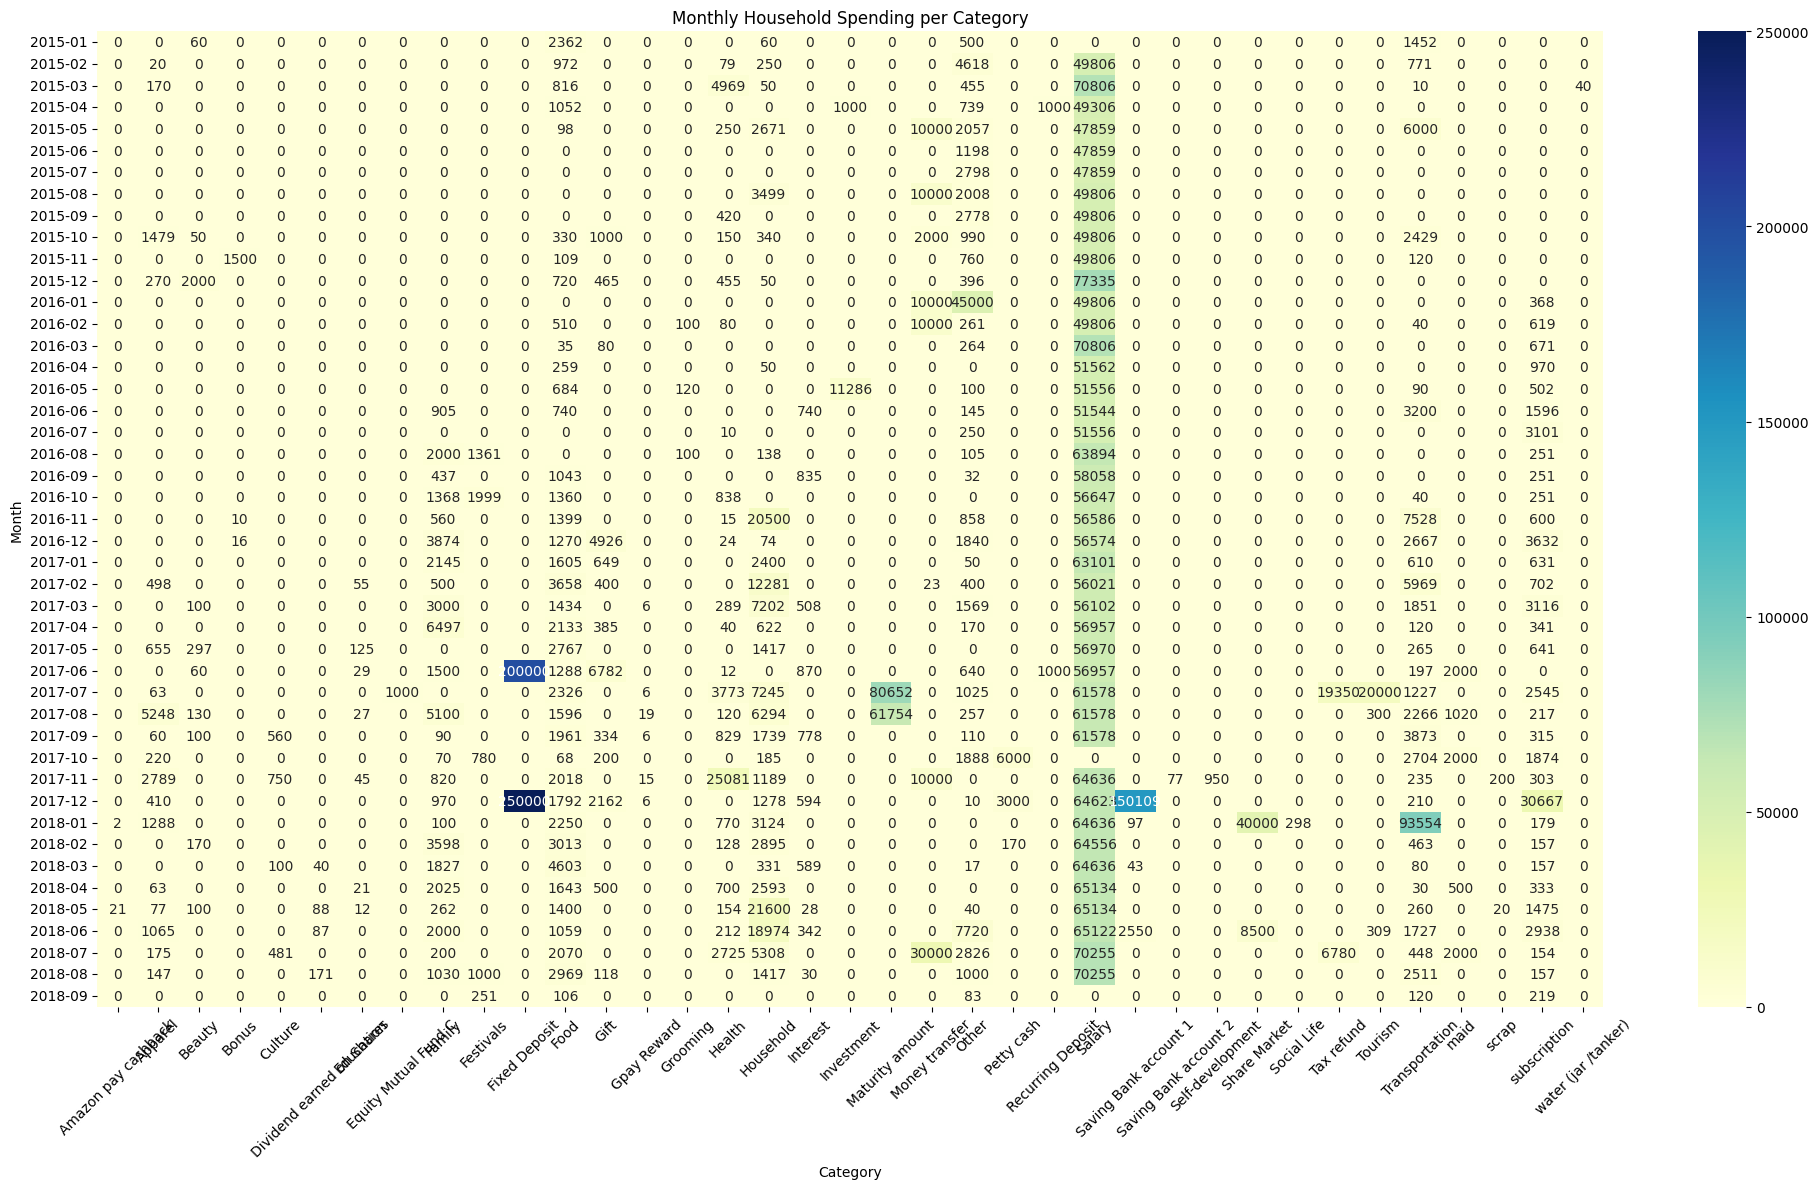

In [56]:
#Visualizing
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
sns.heatmap(monthly_summary, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Household Spending per Category")
plt.xlabel("Category")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()